In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gseapy as gp
from msresist.clinical_data import preprocess_data, CPTAC_GSEA_YAP_by_AXLprot
from msresist.RNAseq import preprocess_AXL_RNAseq_data, run_gsea_from_PCA_EA

matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
rna_f = preprocess_AXL_RNAseq_data()

2025-08-10 16:18:57,353 [INFO] Input gene rankings contains duplicated IDs
2025-08-10 16:18:57,364 [WARNING] Duplicated values found in preranked stats: 1.76% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-08-10 16:18:57,365 [INFO] Parsing data files for GSEA.............................
2025-08-10 16:18:57,381 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-08-10 16:18:57,382 [INFO] 0003 gene_sets used for further statistical testing.....
2025-08-10 16:18:57,382 [INFO] Start to run GSEA...Might take a while..................
2025-08-10 16:18:57,904 [INFO] Congratulations. GSEApy runs successfully................



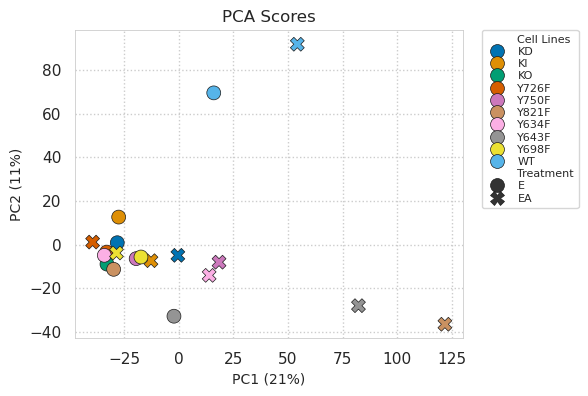

In [3]:
_, ax = plt.subplots(figsize=(5, 4))
res = run_gsea_from_PCA_EA(rna_f, PCA="PC1", plot_pca=True, ax=ax)

In [4]:
res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Mechanoregulation and pathology of YAP/TAZ via...,0.639674,2.16825,0.0,0.0,0.0,14/24,21.46%,MAP4K5;ACTG1;CTNNB1;TEAD1;STK3;ITGB4;YWHAQ;MAP...
1,prerank,CORDENONSI YAP CONSERVED SIGNATURE,0.625917,2.047515,0.0,0.0,0.0,10/21,13.91%,GLS;HEXB;TSPAN3;FLNA;ASAP1;AXL;SH2D4A;STMN1;TH...
2,prerank,YAP1 UP,0.598566,1.73171,0.005725,0.005498,0.009,7/13,21.08%,YWHAZ;TEAD1;FAM45A;RPN2;CNP;NRAS;SEMA3C


/tmp/ipykernel_1445472/1136903984.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


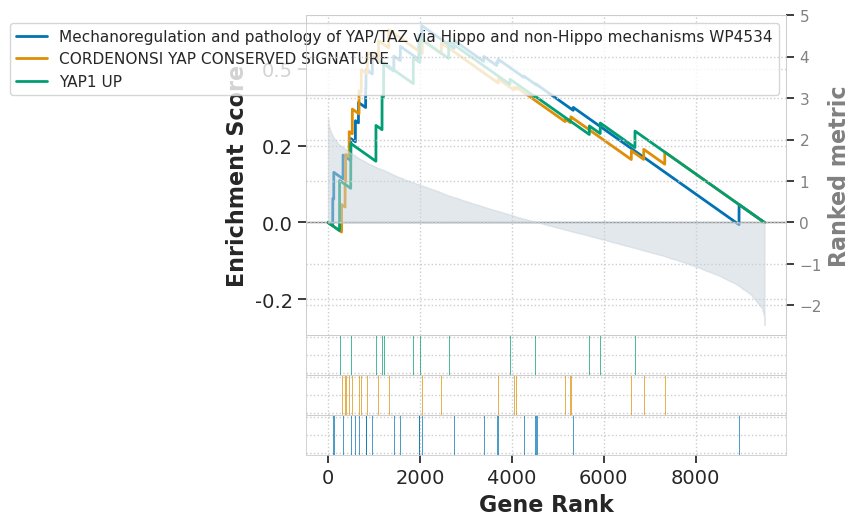

In [5]:
terms = res.res2d.Term
axs = res.plot(terms[[0, 1, 2]], show_ranking=True, legend_kws={'loc': 'upper right'})
plt.tight_layout()
plt.savefig("/home/creixell/AXLomics/msresist/out/plots/PC9_PCA_Cordenonsi_WP4534_YAP-UP.svg")

In [6]:
rna = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_RNAseq.csv").drop_duplicates(subset="geneSymbol")
_, rnaR_tumor, _ = preprocess_data(rna)

prot = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_Protein.csv").drop_duplicates(subset="geneSymbol").set_index("geneSymbol").select_dtypes(include=float).iloc[:, 4:].reset_index()
_, protR_tumor, _ = preprocess_data(prot)

/tmp/ipykernel_1445472/2560715767.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  prot = pd.read_csv("msresist/data/MS/CPTAC/CPTAC_LUAD_Protein.csv").drop_duplicates(subset="geneSymbol").set_index("geneSymbol").select_dtypes(include=float).iloc[:, 4:].reset_index()


In [7]:
gs_res = CPTAC_GSEA_YAP_by_AXLprot(rnaR_tumor, protR_tumor)

2025-08-10 16:20:49,051 [WARNING] Input data contains NA, filled NA with 0


In [10]:
gs_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,CORDENONSI YAP CONSERVED SIGNATURE,0.652846,2.094512,0.0,0.0,0.0,34/57,25.18%,AXL;ITGB2;DAB2;MDFIC;PMP22;MARCKS;TGM2;FLNA;HE...
1,gsea,YAP1 UP,0.485344,1.716884,0.0,0.022222,0.02,10/40,10.97%,SEMA3C;CDK14;MAML2;MSN;SAMSN1;CAMK4;DRAM2;DDB2...
2,gsea,Mechanoregulation and pathology of YAP/TAZ via...,0.333719,1.375189,0.078431,0.103704,0.11,12/46,18.59%,ITGB2;ITGB3;MAP4K1;ACTB;ITGB7;PAK1;ITGB4;PAK2;...


/tmp/ipykernel_1445472/549280186.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


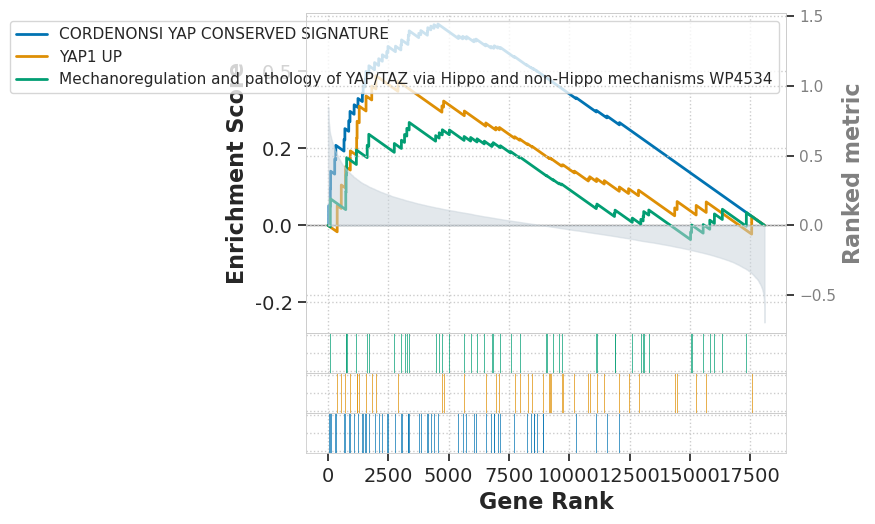

In [13]:
terms = gs_res.res2d.Term
axs = gs_res.plot(terms[[0, 1, 2]], show_ranking=True, legend_kws={'loc': 'upper right'})
plt.savefig("/home/creixell/AXLomics/msresist/out/plots/CPTAC_LUAD_YAP_by_AXLprot.pdf", bbox_inches='tight', dpi=300)
plt.tight_layout()